# Folded Lightcurve Visualization
**Author**: Emma Babula  
**Description**: This notebook folds the lightcurve data for each Centaur object using the best-fit period determined from Lomb-Scargle analysis. The result is a phased lightcurve showing magnitude as a function of rotational phase. Separate phase curves are generated and saved for each filter, aiding in identification of periodic variability and object rotation properties.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

#### Create dictionary of rotation periods

In [3]:
period_dict = {
    '2060': 5.918,
    '54598': 9.17,
    '145627': 30.81
}

#### Fold and plot ligthcurve

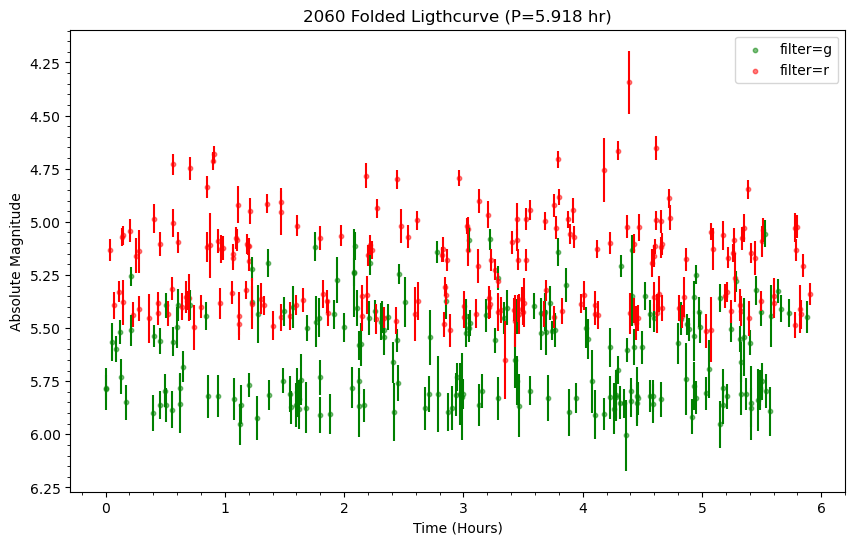

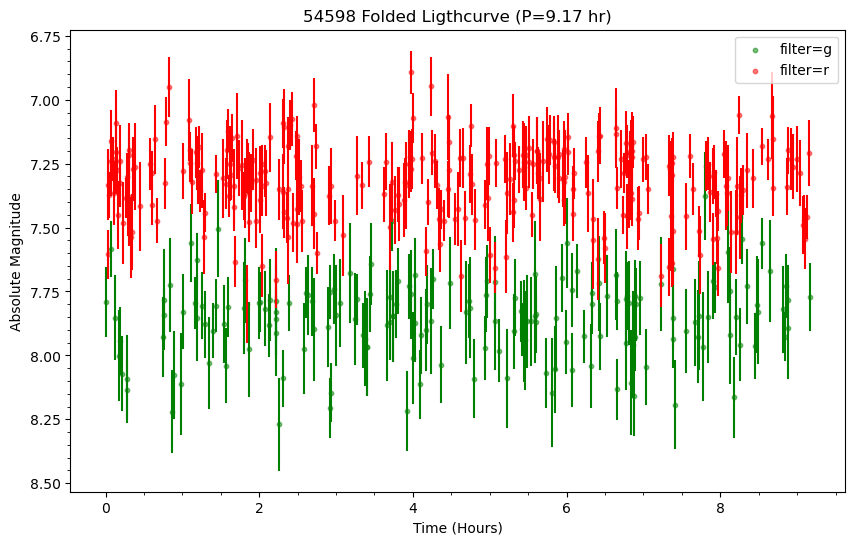

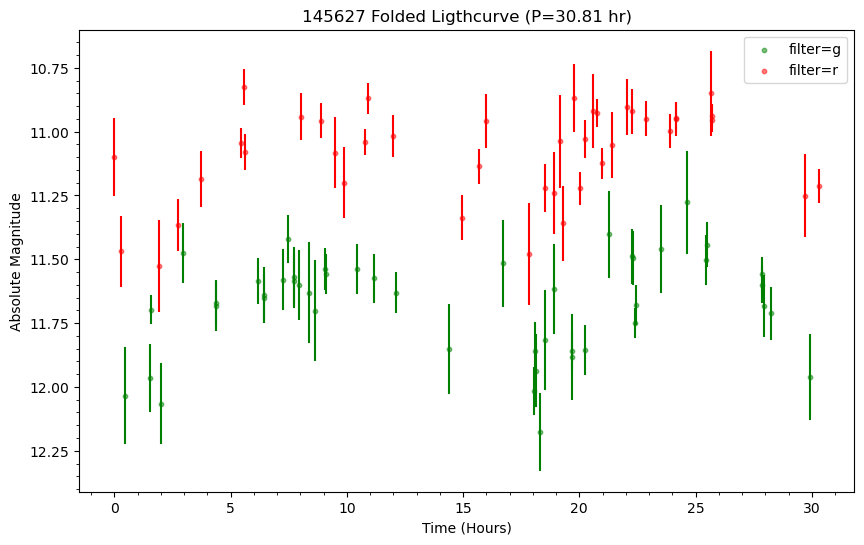

In [8]:
object_list = ['2060', '54598', '145627']

for object in object_list:
    if object not in period_dict:
        print(f"Period value for object {object} is missing.")
        continue

    df = pd.read_csv(f'C:/Users/emmab/Github/Data/Lightcurve Data/{object}_hours_merged.csv')
    
    # Fold x axis over period
    period = period_dict[object]
    t = df['hours']
    x_axis1 = t % period
    
    # Get rid of 145627 outlier
    if object == '145627':
        df = df[df['H'] >= 10]

    fid1_data = df[df['fid'] == 1]
    fid2_data = df[df['fid'] == 2]

    # Plot folded ligthcurves
    plt.figure(figsize=(10, 6))
    
    plt.scatter(x_axis1[fid1_data.index], fid1_data['H'], marker='o', s=10, alpha=0.5, color='green', label='filter=g')
    plt.errorbar(x_axis1[fid1_data.index], fid1_data['H'], xerr=None, yerr=fid1_data['sigmapsf'], fmt='none', color='green')
    
    plt.scatter(x_axis1[fid2_data.index], fid2_data['H'], marker='o', s=10, alpha=0.5, color='red', label='filter=r')
    plt.errorbar(x_axis1[fid2_data.index], fid2_data['H'], xerr=None, yerr=fid2_data['sigmapsf'], fmt='none', color='red')
    
    plt.title(f'{object} Folded Ligthcurve (P={period} hr)')
    plt.xlabel('Time (Hours)')
    plt.ylabel('Absolute Magnitude')
    plt.gca().invert_yaxis()
    plt.minorticks_on()
    plt.legend()
    
    plt.savefig(f'C:/Users/emmab/Github/Lightcurve Generation/Folded Lightcurves/Folded Ligthcurve Plots/{object}_folded_ligthcurve.png')
    plt.show()